This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = ''

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests

In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X/data.json?api_key='+API_KEY
r = requests.get(url, params={'limit':1})

In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
r.json()

{'dataset_data': {'limit': 1,
  'transform': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'start_date': '2000-06-07',
  'end_date': '2018-10-04',
  'frequency': 'daily',
  'data': [['2018-10-04',
    None,
    72.4,
    70.65,
    71.1,
    None,
    170698.0,
    12183209.0,
    None,
    None,
    None]],
  'collapse': None,
  'order': None}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

#### 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017
use keyword start_date and end_date
#### 2. Convert the returned JSON object into a Python dictionary.

In [5]:
r = requests.get(url, params={'start_date':'2017-01-01', 'end_date':'2017-12-31'})
stock_data = r.json()

Convert data into numpy array, and select the the columns we need for later analysis (the 'column_names' tells us the correct column indices). Note we flip rows to make earlier date come first, and convert numerical columns to float type so that the 'None' values are converted to np.nan.

In [6]:
import numpy as np
data_array = np.flip(np.array(stock_data['dataset_data']['data']), axis=0)
date = data_array[:,0].astype('datetime64[D]') #convert to datetime type -- this is good for plotting
open_price = data_array[:,1].astype('float') #open price
high_price = data_array[:,2].astype('float') #high price
low_price = data_array[:,3].astype('float')  #low price
close_price = data_array[:,4].astype('float')#close price
traded_volumn = data_array[:,6].astype('float') #traded volumn

#### 3. Calculate what the highest and lowest opening prices were for the stock in this period.

Visualizing the opening price w.r.t date:

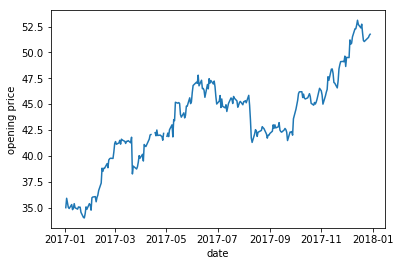

In [14]:
import matplotlib.pyplot as plt
plt.plot(date, open_price)
plt.xlabel('date')
plt.ylabel('opening price')
plt.show()

find the date with highest opening price

In [8]:
price = np.nanmax(open_price)
day = date[np.nanargmax(open_price)].astype('str')
print('highest opening price is at %s with opening price = %f'%(day,price)) 

highest opening price is at 2017-12-14 with opening price = 53.110000


#### 4. What was the largest change in any one day (based on High and Low price)?

visualize the price change

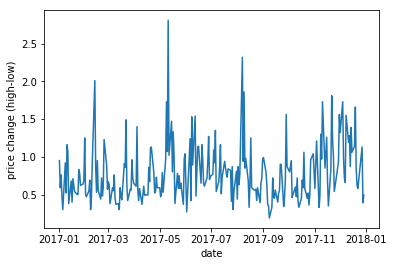

In [9]:
plt.plot(date, high_price-low_price)
plt.xlabel('date')
plt.ylabel('price change (high-low)')
plt.show()

find the day with maximum price change (consider the absolute change)

In [10]:
price = np.nanmax(np.abs(high_price-low_price))
day = date[np.nanargmax(np.abs(high_price-low_price))].astype('str')
print('largest price change is at %s with change = %f'%(day,price)) 

largest price change is at 2017-05-11 with change = 2.810000


#### 5. What was the largest change between any two days (based on Closing Price)?
Compute price change between one day and next day.

In [11]:
price_change = close_price[1:] - close_price[:-1]
day = date[np.nanargmax(price_change)]
print('The max price change is between %s and %s.'%(day.astype('str'),(day+1).astype('str')))

The max price change is between 2017-05-10 and 2017-05-11.


#### 6. What was the average daily trading volume during this year?
use the np.mean() function on traded_volumn array.

In [12]:
print('averge traded volumn in 2017:',np.mean(traded_volumn))

averge traded volumn in 2017: 89124.33725490196


#### 6. What was the median daily trading volume during this year?
use the np.median() function on traded_volumn array.

In [13]:
print('median of traded volumn in 2017:',np.median(traded_volumn))

median of traded volumn in 2017: 76286.0
